# Exploratory Data Analysis using SQLite

In [1]:
# All the imports done here
import os
import sqlite3
import csv
import pprint
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# file locations
file_location = "/Users/Raj/Root/GitHub/__Datasets__/OSM/processed-osm"
DATABASE_FILE = file_location+"/chicago_osm_sqlite3_database.db"
CSV_FILES_LOCATION = file_location+"/csv-files"

In [3]:
# establishing sqlite3 connection
con = sqlite3.connect(DATABASE_FILE)
con.text_factory = str
cur = con.cursor()

In [4]:
def print_file_size():
    """
    function to print the file size of the files used in this analysis
    """
    csv_file_names = os.listdir(CSV_FILES_LOCATION)
    file_paths = [os.path.join(CSV_FILES_LOCATION, name) for name in csv_file_names 
                 if name != '.DS_Store']
    file_paths.insert(0, DATABASE_FILE)
    file_size = [str(path.replace(file_location, ""))+" ====> "+
                     str(os.stat(path).st_size/1000000)+" MB" 
                 for path in file_paths]
    pprint.pprint(file_size)

In [5]:
def create_barplot(data):
    """
    function to create barplot
    """
    data_dict = {}
    for i in data:
        data_dict[i[0]] = i[1]

    plt.bar(range(len(data_dict)), list(data_dict.values()), align='center')
    plt.xticks(range(len(data_dict)), list(data_dict.keys()))
    plt.xticks(rotation=75)
    plt.show()

#### Printing the file size of database and other csv files

In [6]:
print_file_size()

['/chicago_osm_sqlite3_database.db ====> 1249.3568 MB',
 '/csv-files/ways_tags.csv ====> 227.410062 MB',
 '/csv-files/nodes_tags.csv ====> 13.599578 MB',
 '/csv-files/nodes.csv ====> 787.316953 MB',
 '/csv-files/ways.csv ====> 82.570584 MB',
 '/csv-files/ways_nodes.csv ====> 254.503969 MB']


#### Getting the total number of Nodes

In [7]:
query_result = cur.execute('SELECT COUNT(*) FROM Nodes')
print(query_result.fetchone()[0])

8955919


#### Number of ways

In [8]:
query_result = cur.execute('SELECT COUNT(*) FROM Ways')
print(query_result.fetchone()[0])

1272994


#### Number of Unique users

In [9]:
query = """SELECT COUNT(DISTINCT(w.uid)) 
            FROM (SELECT uid FROM Nodes UNION ALL SELECT uid FROM Ways) w"""
query_result = cur.execute(query)
print(query_result.fetchone()[0])

3100


#### Top 10 contributing users

In [21]:
users = list()
query = """SELECT e.user, COUNT(*) as num
            FROM (SELECT user FROM Nodes UNION ALL SELECT user FROM Ways) e
            GROUP BY e.user
            ORDER BY num DESC
            LIMIT 10"""
for row in cur.execute(query):
    users.append(row)
pprint.pprint(users)

[('chicago-buildings', 5594296),
 ('Umbugbene', 1077746),
 ('woodpeck_fixbot', 212103),
 ('alexrudd (NHD)', 196117),
 ('g246020', 135168),
 ('mpinnau', 104045),
 ('patester24', 102645),
 ('Oak_Park_IL', 101062),
 ('asdf1234', 98634),
 ('Zol87', 95271)]


#### Boundary of Chicago City
By looking at the top 10 surrounding cities we can get a sense of boundary area of Chicago city.

In [11]:
query = """SELECT tags.value, COUNT(*) as count 
            FROM (SELECT * FROM nodesTags UNION ALL 
                  SELECT * FROM waysTags) tags
            WHERE tags.key LIKE '%city'
            GROUP BY tags.value
            ORDER BY count DESC
            LIMIT 10;
            """
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)

[('Evanston', 17012),
 ('Chicago', 3816),
 ('Naperville', 2282),
 ('River Forest', 1738),
 ('Island Lake', 1259),
 ('Buffalo Grove', 847),
 ('Lombard', 603),
 ('Hoffman Estates', 532),
 ('Hinsdale', 464),
 ('Skokie', 435)]


#### Cafes and Restaurants

[('cafe', 581), ('hotel', 447), ('pub', 227), ('restaurant', 2560)]


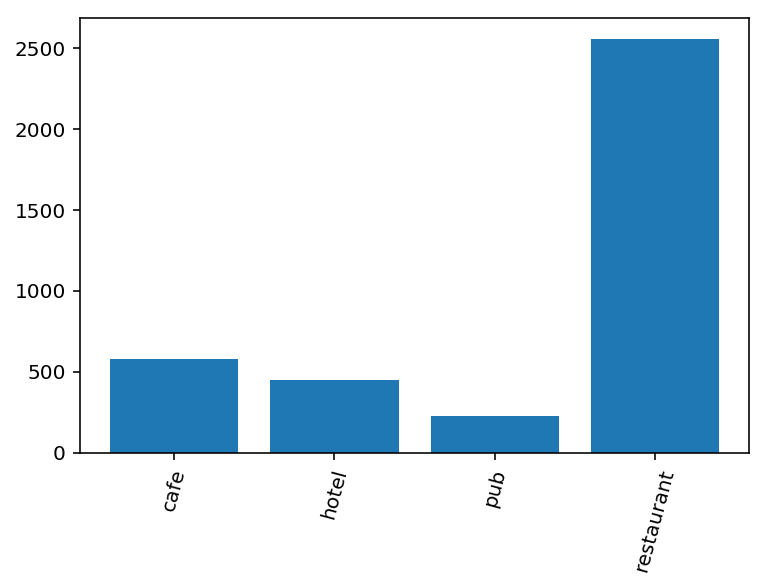

In [12]:
query = """SELECT value, COUNT(*)
            FROM (SELECT * from nodesTags as T UNION ALL 
                  SELECT * from waysTags as Z) as Q
            WHERE (value = 'restaurant' OR value = 'hotel' OR  
                   value = 'pub' OR value = 'cafe')
            GROUP BY value;"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

#### Common Amenities

[('place_of_worship', 2980),
 ('school', 1827),
 ('restaurant', 1765),
 ('fast_food', 943),
 ('bench', 646),
 ('parking', 578),
 ('bicycle_parking', 499),
 ('cafe', 488),
 ('fuel', 404),
 ('bicycle_rental', 392),
 ('drinking_water', 327),
 ('bank', 324),
 ('bar', 289),
 ('fountain', 254),
 ('shelter', 232)]


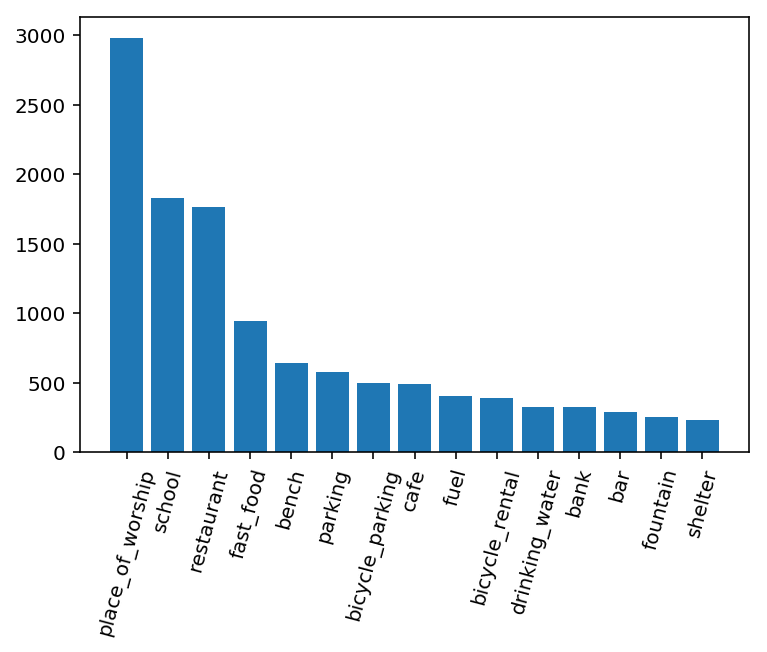

In [13]:
query = """SELECT value, COUNT(*) as num \
            FROM nodesTags \
            WHERE key="amenity" \
            GROUP BY value \
            ORDER BY num DESC \
            LIMIT 15"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

#### Most number of Shops

[('supermarket', 299),
 ('clothes', 242),
 ('convenience', 213),
 ('hairdresser', 140),
 ('car_repair', 109),
 ('bakery', 91),
 ('mobile_phone', 88),
 ('beauty', 87),
 ('department_store', 86),
 ('alcohol', 85)]


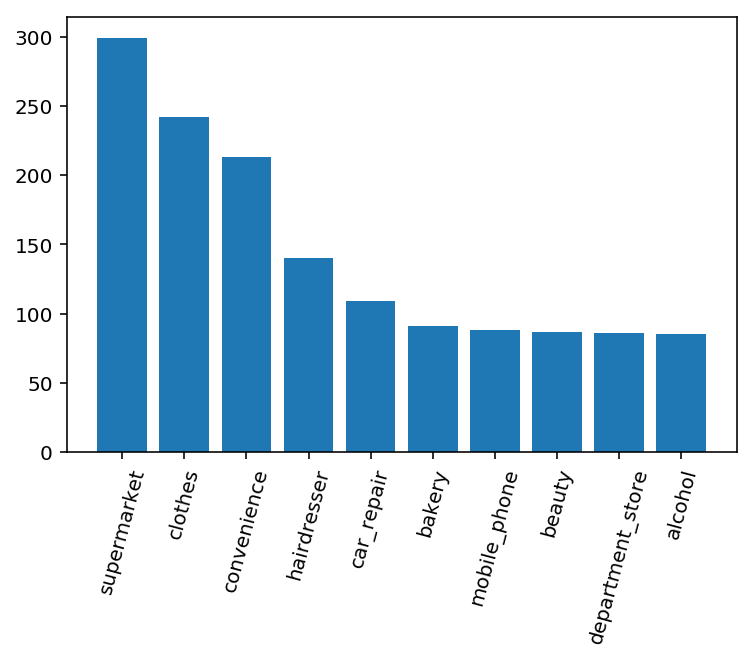

In [14]:
query = """SELECT value, count(value) as num
            FROM nodesTags
            WHERE nodesTags.key = "shop"
            GROUP by value
            ORDER by num DESC
            LIMIT 10;"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

#### Pharmacies in the city

[('Walgreens', 84),
 ('CVS', 28),
 ("Walgreen's", 16),
 ('CVS Pharmacy', 14),
 ('Osco', 2)]


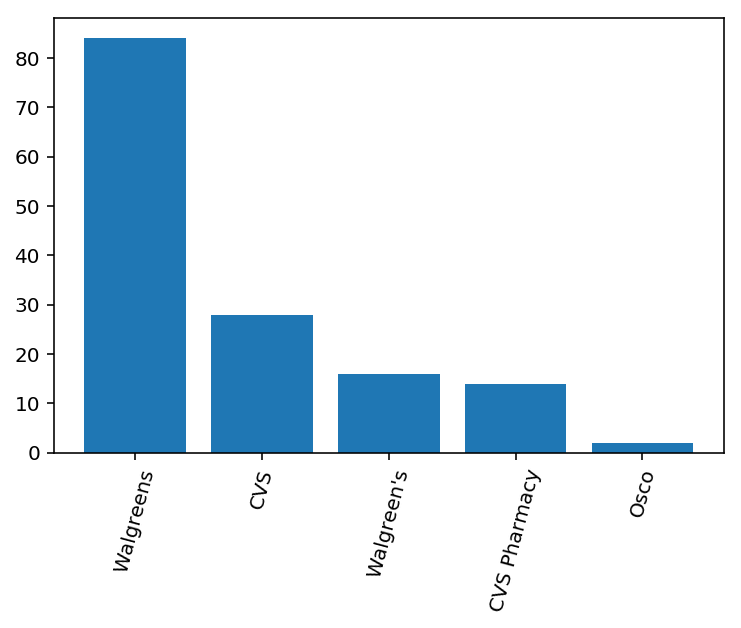

In [15]:
query = """SELECT nodesTags.value, COUNT(*) as num
        FROM nodesTags
            JOIN (SELECT DISTINCT(id) FROM nodesTags WHERE value='pharmacy') i
            ON nodesTags.id=i.id
        WHERE nodesTags.key='name'
        GROUP BY nodesTags.value
        ORDER BY num DESC
        LIMIT 5;"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

#### Most number of coffee shops

[('Starbucks', 60),
 ('Starbucks Coffee', 18),
 ("Dunkin' Donuts", 13),
 ("Peet's Coffee & Tea", 6),
 ('Caribou Coffee', 4)]


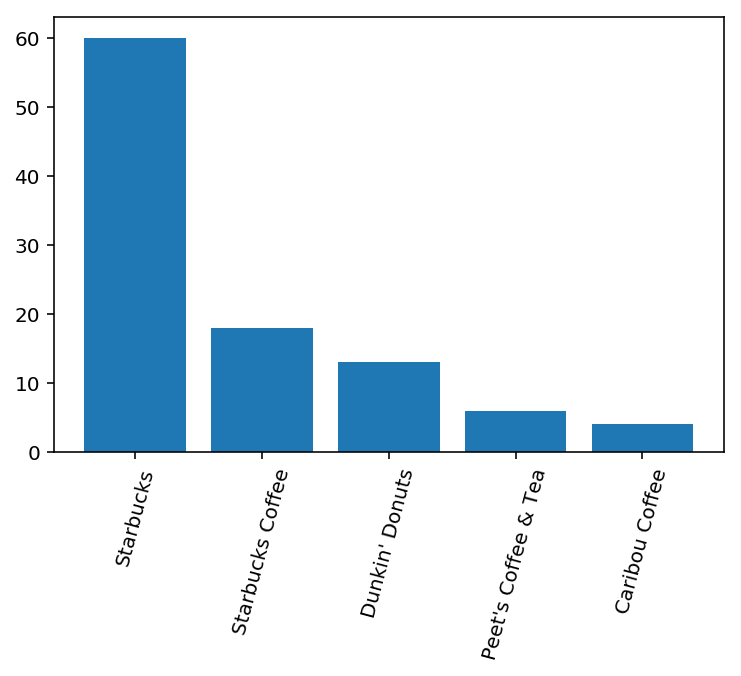

In [16]:
query = """SELECT nodesTags.value, COUNT(*) as num
        FROM nodesTags
            JOIN (SELECT DISTINCT(id) FROM nodesTags WHERE value LIKE '%Coffee%') i
            ON nodesTags.id=i.id
        WHERE nodesTags.key='name'
        GROUP BY nodesTags.value
        ORDER BY num DESC
        LIMIT 5;"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

#### Popular Cuisines

[('pizza', 149),
 ('mexican', 129),
 ('american', 84),
 ('italian', 64),
 ('chinese', 61),
 ('burger', 47),
 ('sandwich', 44),
 ('thai', 35),
 ('japanese', 29),
 ('indian', 23)]


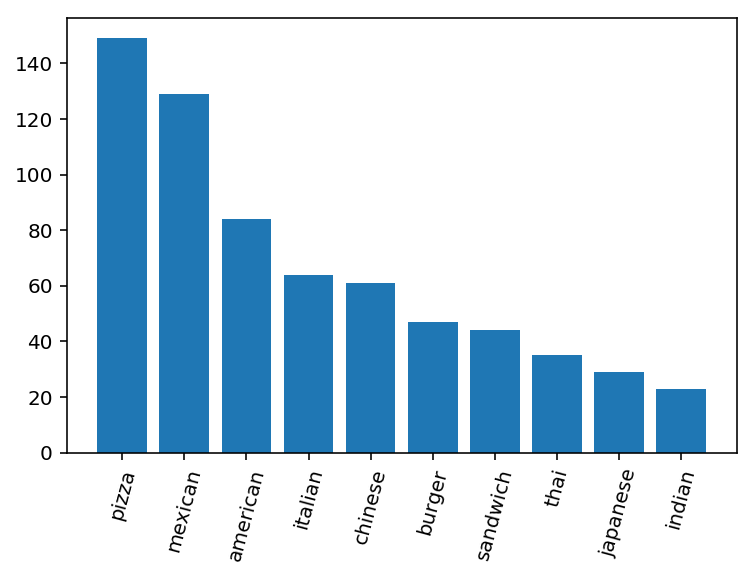

In [17]:
query = """SELECT nodesTags.value, COUNT(*) as num
        FROM nodesTags
            JOIN (SELECT DISTINCT(id) FROM nodesTags WHERE value='restaurant') i
            ON nodesTags.id=i.id
        WHERE nodesTags.key='cuisine'
        GROUP BY nodesTags.value
        ORDER BY num DESC
        LIMIT 10;"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

#### Most Popular Fast Food Joints

[('Subway', 122),
 ("McDonald's", 95),
 ('Burger King', 39),
 ("Dunkin' Donuts", 36),
 ("Jimmy John's", 35)]


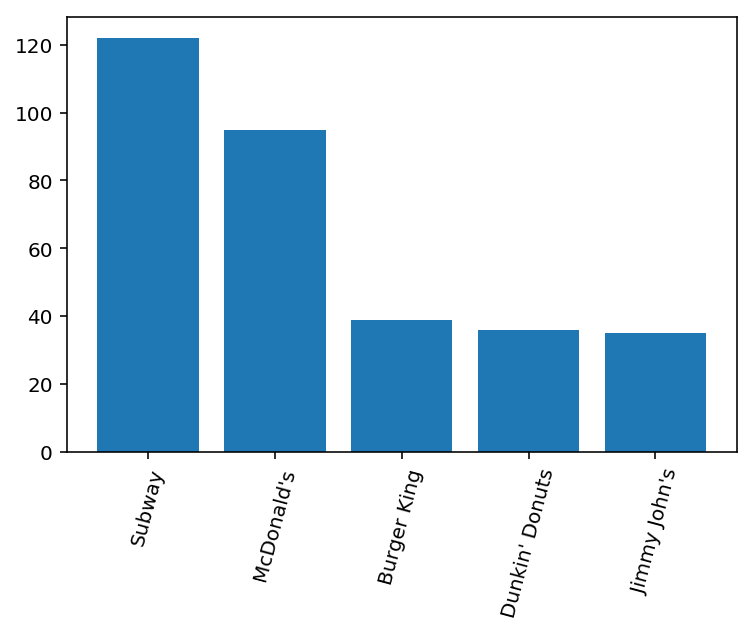

In [18]:
query = """SELECT nodesTags.value, COUNT(*) as num
        FROM nodesTags
            JOIN (SELECT DISTINCT(id) FROM nodesTags WHERE value='fast_food') i
            ON nodesTags.id=i.id
        WHERE nodesTags.key='name'
        GROUP BY nodesTags.value
        ORDER BY num DESC
        LIMIT 5;"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

#### Most Popular Banks

[('Chase', 64),
 ('Bank of America', 26),
 ('Citibank', 14),
 ('BMO Harris Bank', 13),
 ('PNC Bank', 12)]


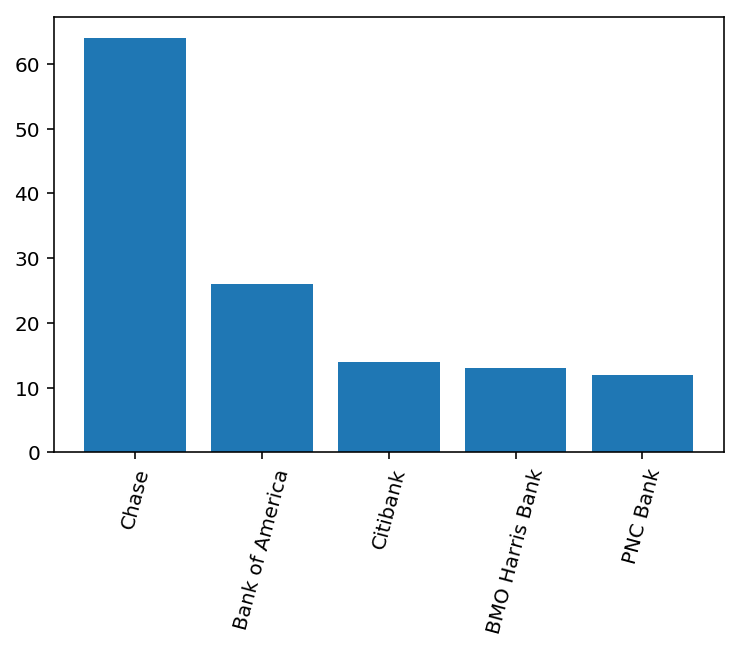

In [19]:
query = """SELECT nodesTags.value, COUNT(*) as num
        FROM nodesTags
            JOIN (SELECT DISTINCT(id) FROM nodesTags WHERE value='bank') i
            ON nodesTags.id=i.id
        WHERE nodesTags.key='name'
        GROUP BY nodesTags.value
        ORDER BY num DESC
        LIMIT 5;"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

#### Biggest Religion based on Place of Worship

[('christian', 2817),
 ('jewish', 37),
 ('muslim', 8),
 ('buddhist', 7),
 ('unitarian_universalist', 4),
 ('hindu', 3)]


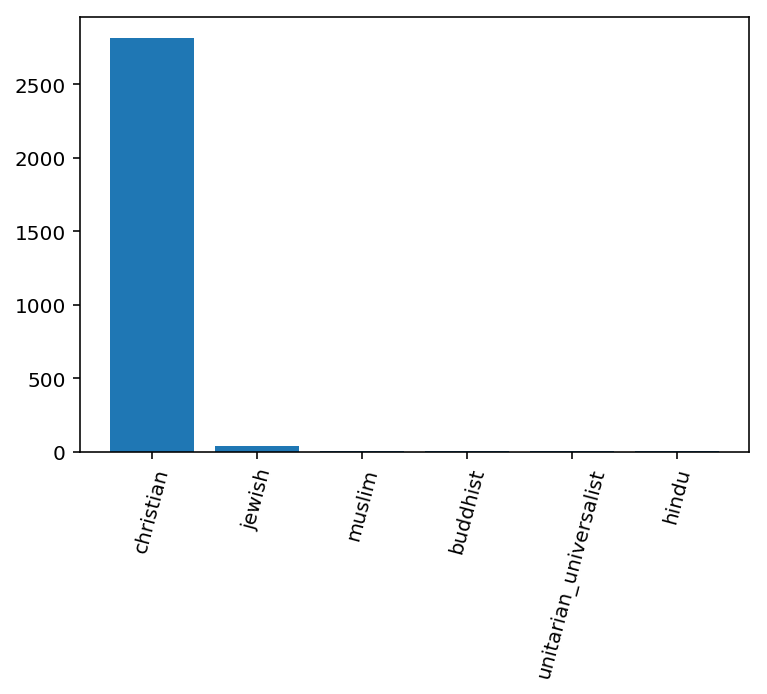

In [20]:
query = """SELECT nodesTags.value, COUNT(*) as num \
            FROM nodesTags \
                JOIN (SELECT DISTINCT(id) FROM nodesTags WHERE value="place_of_worship") i \
                ON nodesTags.id=i.id \
            WHERE nodesTags.key="religion" \
            GROUP BY nodesTags.value \
            ORDER BY num DESC \
            LIMIT 10;"""
data = list()
for row in cur.execute(query):
    data.append(row)
pprint.pprint(data)
create_barplot(data)

---